In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


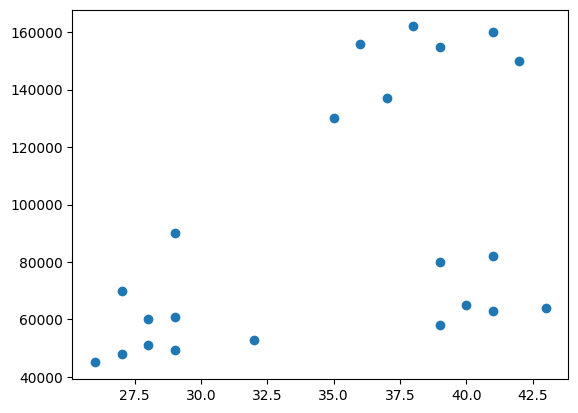

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\21raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\21raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\21raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\21raj\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", l

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


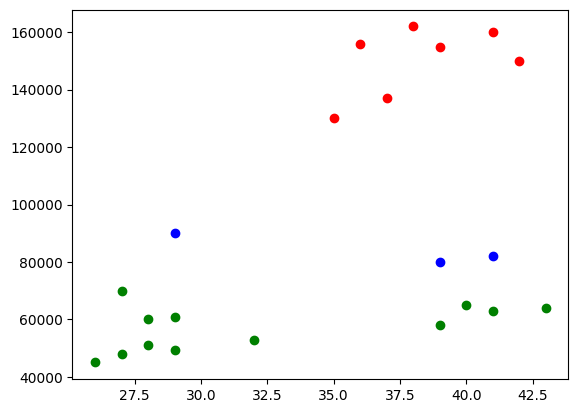

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')    
plt.scatter(df3['Age'],df3['Income($)'],color='blue')

In [9]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)','Age']])
df['Income($)']=scaler.transform(df[['Income($)','Age']])
#scaler.fit(df[['Age']])
#df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [10]:
kmeans=KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [11]:
y_pred=kmeans.fit_predict(df[['Age','Income($)']])
df['clus']=y_pred
df.drop('cluster',axis='columns',inplace=True)

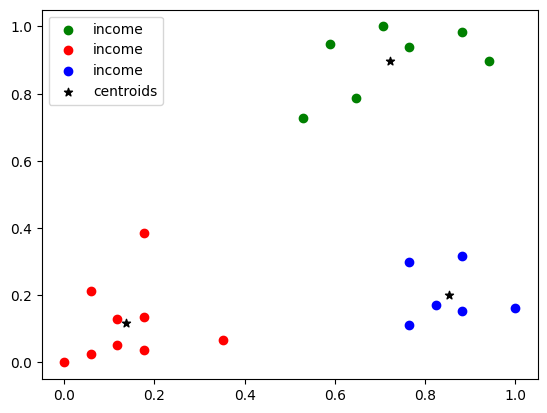

In [21]:
df1=df[df.clus==0]
df2=df[df.clus==1]
df3=df[df.clus==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green',label='income')
plt.scatter(df2['Age'],df2['Income($)'],color='red',label='income')    
plt.scatter(df3['Age'],df3['Income($)'],color='blue',label='income')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroids')
plt.legend()

In [18]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [22]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [23]:
sse

[5.434011511988176,
 2.345614491472593,
 0.4750783498553095,
 0.34910470944195643,
 0.3244340366625681,
 0.32185300263036637,
 0.18311629202780533,
 0.1525036824792096,
 0.11612804668175383]

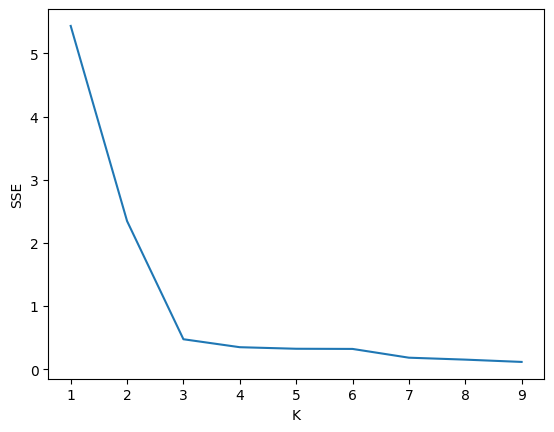

In [24]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)